In [2]:
# import necessary libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

seed = 177
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
# read in the dataset
data = pd.read_csv("Surveys_transformed.csv", sep=',')

In [4]:
# see what the data looks like
display(data.head())
print(data.shape)

,salary,compensation,age_band_le,overall_experience_band_le,field_experience_band_le,education_le,"Accounting, Banking & Finance",Agriculture or Forestry,Art & Design,Business or Consulting,...,netherlands,new zealand,south africa,spain,switzerland,united kingdom,united states of america,No answer,Non-binary,Woman
0,55000,0,2,2,2,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,67158,4920,2,3,2,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,34000,0,2,1,1,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,62000,3000,2,3,2,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,60000,7000,2,3,2,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


(25508, 55)


# Selecting a model
## Why linear regression?
The model is relatively simplistic en can make accurate predictions if a linear relationship is present in the data.<br/> 
Unfortunately it is quite sensitive to outliers, but these have been filtered out during the data transformation.<br/>
https://www.edureka.co/blog/linear-regression-for-machine-learning/#linear<br/>

## Why K-neighbors regressor?
Unlike linear regression K-neighbors regressor doesnt rely on underleying correlations. It simply looks at the 'K' amount closest (most similar in values) data points and will determine the prediction based on those data points. The drawbacks is its computational cost since it calculates a lot in memory, especially if the value of K is large.<br/>
https://learn.g2.com/k-nearest-neighbor<br/>

## Why SVR?
SVR generalize well on unseen data, meaning it would get a good score during evaluating the model with the holdout set.<br/>
Another advantage is that its computational complexity doesnt depend on the dimensional data we give as input, which is beneficial considering the many dummy column the data has. The downside is that, like linear regression, its sensitive to outliers and noise.<br/>
https://link.springer.com/chapter/10.1007/978-1-4302-5990-9_4<br/>


# Training, evaluating and visualizing

In [5]:
# prepare data for training
X = data.drop('salary', axis='columns')
y = data['salary']

# split in traing and holdout set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [6]:
# linear regression traing and fitting
lr  = LinearRegression()
lr.fit(X_train, y_train)

# linear regression scoring
r2_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
mse_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

# train results
print(f"r2 train: {r2_scores.mean()}")
print(f"mse train: {mse_scores.mean()}")
print(f"mae train: {mae_scores.mean()}\n")

# create predictions
y_pred = lr.predict(X_test)

# test results
print(f"r2 test: {r2_score(y_test, y_pred)}")
print(f"mse test: {mean_squared_error(y_test, y_pred)}")
print(f"mae test: {mean_absolute_error(y_test, y_pred)}")

r2 train: 0.4322719112411694
mse train: 762235792.025914
mae train: 20778.633968863705

r2 test: 0.4433148673498567
mse test: 767005888.3198858
mae test: 20897.412655350934


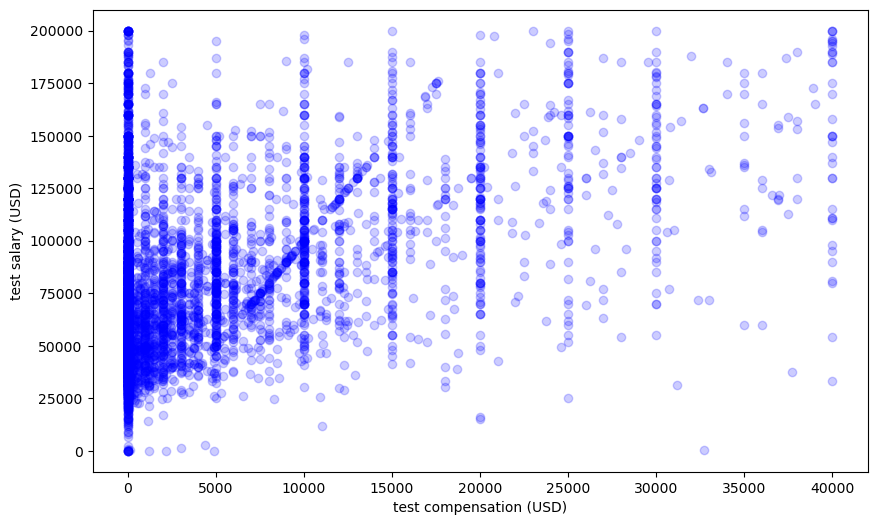

In [7]:
# linear regression test data visualized
plt.scatter(X_test['compensation'], y_test, color='b', alpha=0.20)
plt.xlabel('test compensation (USD)')
plt.ylabel('test salary (USD)')
plt.show()

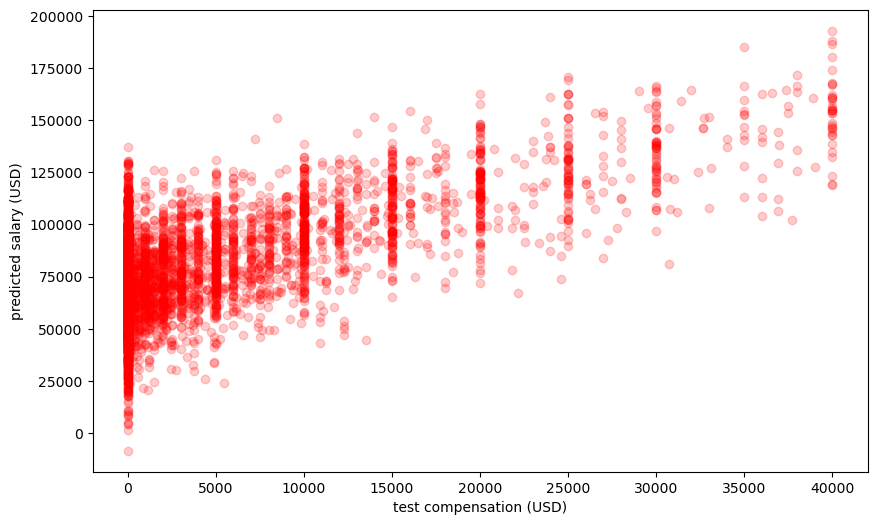

In [8]:
# linear regression predictions data visualized
plt.scatter(X_test['compensation'], y_pred, color='r', alpha=0.20)
plt.xlabel('test compensation (USD)')
plt.ylabel('predicted salary (USD)')
plt.show()

In [9]:
# instantiate knn model
knn = KNeighborsRegressor()

# tune leaf_size, n_neighbors and p hyperparameters
n_neighbors = list(range(4, 7))
leaf_size = list(range(28, 33))
p = list(range(1, 3))

knn_hyperparameters = {
    'n_neighbors': n_neighbors,
    'leaf_size': leaf_size,
    'p': p
}

# use gridsearch to find best combination of the 3 hyperparameters
GSCV = GridSearchCV(knn, knn_hyperparameters, cv=5)

# fit the model with optimal hyperparameters
knn_optimal = GSCV.fit(X_train, y_train)

# value of best hyperparameters
print('optimal n_neighbors:', knn_optimal.best_estimator_.get_params()['n_neighbors'])
print('optimal leaf_size:', knn_optimal.best_estimator_.get_params()['leaf_size'])
print('optimal p:', knn_optimal.best_estimator_.get_params()['p'])

optimal n_neighbors: 6
optimal leaf_size: 28
optimal p: 1


In [10]:
# knn scoring
r2_scores = cross_val_score(knn_optimal, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
mse_scores = cross_val_score(knn_optimal, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(knn_optimal, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

# train results
print(f"r2 train: {r2_scores.mean()}")
print(f"mse train: {mse_scores.mean()}")
print(f"mae train: {mae_scores.mean()}\n")

# create predictions
y_pred = knn_optimal.predict(X_test)

# test results
print(f"r2 test: {r2_score(y_test, y_pred)}")
print(f"mse test: {mean_squared_error(y_test, y_pred)}")
print(f"mae test: {mean_absolute_error(y_test, y_pred)}")

r2 train: 0.3618333775285504
mse train: 856023573.4674232
mae train: 22068.157726984828

r2 test: 0.3620950251904188
mse test: 878911332.7641001
mae test: 22309.069154774974


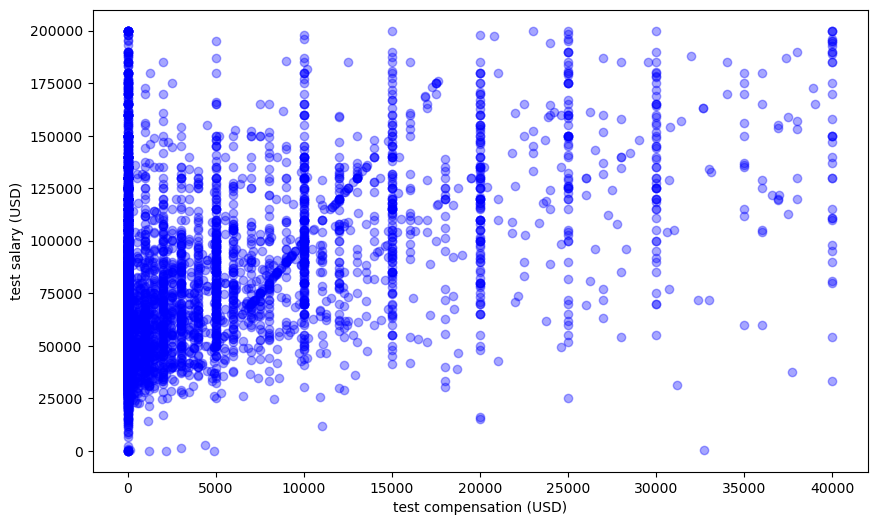

In [11]:
# knn test data visualized
plt.scatter(X_test['compensation'], y_test, color='b', alpha=0.35)
plt.xlabel('test compensation (USD)')
plt.ylabel('test salary (USD)')
plt.show()

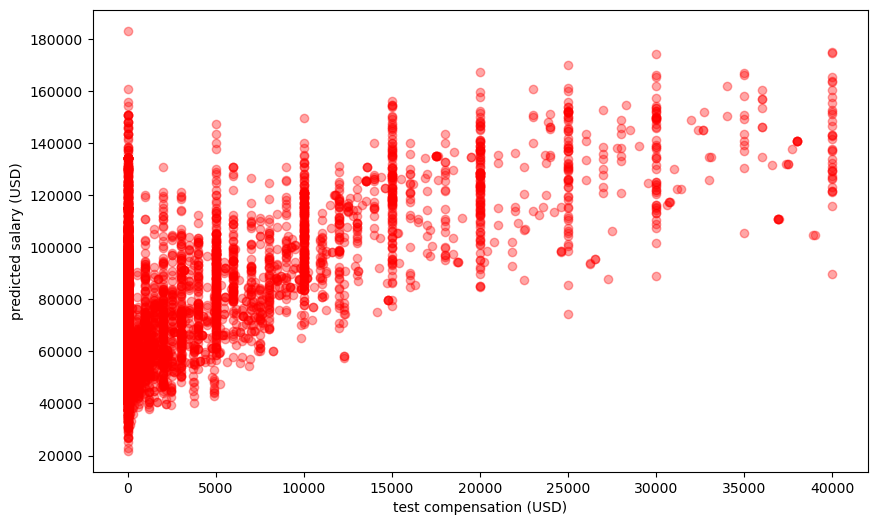

In [12]:
# knn predictions data visualized
plt.scatter(X_test['compensation'], y_pred, color='r', alpha=0.35)
plt.xlabel('test compensation (USD)')
plt.ylabel('predicted salary (USD)')
plt.show()

In [ ]:
svr = SVR()

# tune leaf_size, n_neighbors and p hyperparameters
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
degree = list(range(1, 10))
gamma = ['scale', 'auto']
C = list(range(1, 10))

svr_hyperparameters = {
    'kernel': kernel,
    'degree': degree,
    'gamma': gamma,
    'C': C
}

# use gridsearch to find best combination of the 3 hyperparameters
GSCV = GridSearchCV(svr, svr_hyperparameters, cv=5)

# fit the model with optimal hyperparameters
svr_optimal = GSCV.fit(X_train, y_train)

# value of best hyperparameters
print('optimal kernel:', svr_optimal.best_estimator_.get_params()['kernel'])
print('optimal degree:', svr_optimal.best_estimator_.get_params()['degree'])
print('optimal gamma:', svr_optimal.best_estimator_.get_params()['gamma'])
print('optimal C:', svr_optimal.best_estimator_.get_params()['C'])

In [ ]:
# svr scoring
r2_scores = cross_val_score(svr_optimal, X_train, y_train, cv=5, scoring=make_scorer(r2_score))
mse_scores = cross_val_score(svr_optimal, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(svr_optimal, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

# train results
print(f"r2 train: {r2_scores.mean()}")
print(f"mse train: {mse_scores.mean()}")
print(f"mae train: {mae_scores.mean()}\n")

# create predictions
y_pred = svr_optimal.predict(X_test)

# test results
print(f"r2 test: {r2_score(y_test, y_pred)}")
print(f"mse test: {mean_squared_error(y_test, y_pred)}")
print(f"mae test: {mean_absolute_error(y_test, y_pred)}")

In [ ]:
# svr test data visualized
plt.scatter(X_test['compensation'], y_test, color='b', alpha=0.35)
plt.xlabel('test compensation (USD)')
plt.ylabel('test salary (USD)')
plt.show()

In [ ]:
# svr predictions data visualized
plt.scatter(X_test['compensation'], y_pred, color='r', alpha=0.35)
plt.xlabel('test compensation (USD)')
plt.ylabel('predicted salary (USD)')
plt.show()

# Evaluation
All models perform mediocre. KNN and SVR take a considerable time to predict values and find optimal hyperparameters in addition to that. Linear regresion doesnt get bothered by this due to its simplistic design. The poor performance may not even be due to the models themself being subpar, but the data not predictable enough.